In [7]:
from __future__ import print_function, division, absolute_import

import GPy
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

import safeopt

mpl.rcParams['figure.figsize'] = (20.0, 10.0)
mpl.rcParams['font.size'] = 20
mpl.rcParams['lines.markersize'] = 20

## Define a kernel and function

Here we define a kernel. The function is drawn at random from the GP and is corrupted my Gaussian noise

In [14]:
# Measurement noise
noise_var = 1e-5 ** 2

# Bounds on the inputs variable
#bounds = [(-10., 11.)]
bounds = [(-5.0, 5.0)]
parameter_set = safeopt.linearly_spaced_combinations(bounds, 1000)

# Define Kernel
kernel = GPy.kern.RBF(input_dim=len(bounds), variance=noise_var, lengthscale=1.0, ARD=True)

# Initial safe point
x0 = np.zeros((1, len(bounds)))

# Generate function with safe initial point at x=0
def sample_safe_fun():
    while True:
        fun = safeopt.sample_gp_function(kernel, bounds, noise_var, 100)
        if fun(0, noise=False) > 0.5:
            break
    return fun



## Interactive run of the algorithm

In [9]:
# Define the objective function
#fun = lambda x: np.cos(x) + np.tanh(x) - np.sin(x)#sample_safe_fun()
fun = lambda x : np.cos(x) + np.tanh(x) - np.sin(x)
x0 = np.zeros((1, len(bounds))) #+ 0.5
print(x0)
# The statistical model of our objective function
gp = GPy.models.GPRegression(x0, fun(x0), kernel, noise_var=noise_var)
jmin = 0.4
# The optimization routine
#opt = safeopt.SafeOpt(gp, 0., bounds=bounds, threshold=jmin)
opt = safeopt.SafeOpt(gp, parameter_set, -1., lipschitz=None, threshold=jmin)

[[0.]]


In [10]:
safeopt.SafeOpt?

Init signature:
safeopt.SafeOpt(
    gp,
    parameter_set,
    fmin,
    lipschitz=None,
    beta=2,
    num_contexts=0,
    threshold=0,
    scaling='auto',
)
Docstring:     
A class for Safe Bayesian Optimization.

This class implements the `SafeOpt` algorithm. It uses a Gaussian
process model in order to determine parameter combinations that are safe
with high probability. Based on these, it aims to both expand the set of
safe parameters and to find the optimal parameters within the safe set.

Parameters
----------
gp: GPy Gaussian process
    A Gaussian process which is initialized with safe, initial data points.
    If a list of GPs then the first one is the value, while all the
    other ones are safety constraints.
parameter_set: 2d-array
    List of parameters
fmin: list of floats
    Safety threshold for the function value. If multiple safety constraints
    are used this can also be a list of floats (the first one is always
    the one for the values, can be set to None if n

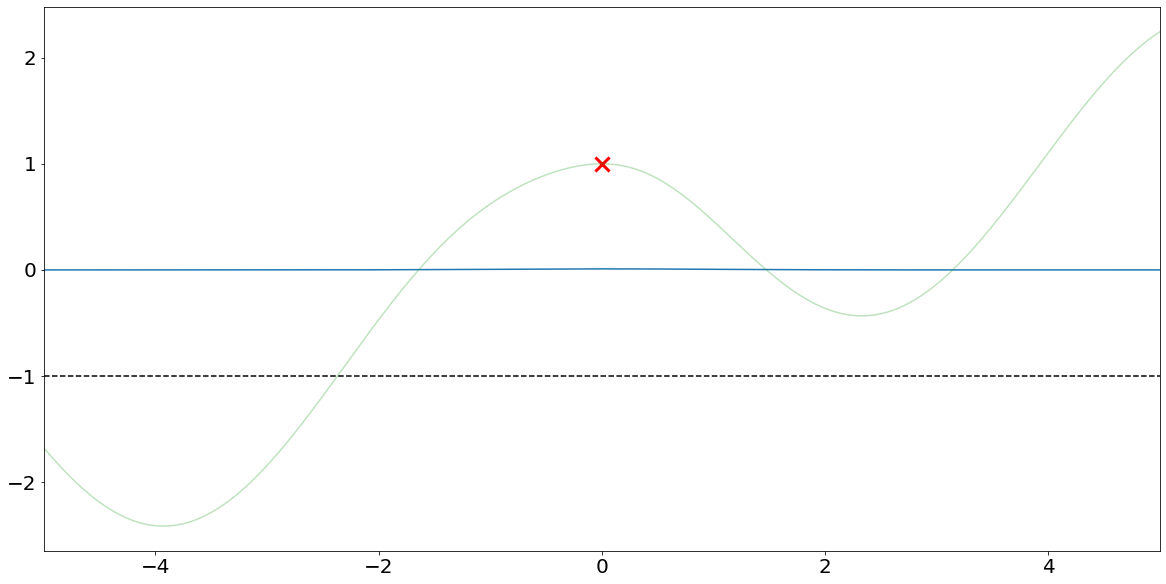

In [11]:
def plot_gp():
    # Plot the GP
    opt.plot(1000)
    # Plot the true function
    plt.plot(parameter_set, fun(parameter_set), color='C2', alpha=0.3)
    
plot_gp()

[--] t: 0	xt: [-0.05505506]	yt: [0.9985126]
[--] t: 1	xt: [-0.05505506]	yt: [0.9985126]
[--] t: 2	xt: [-0.05505506]	yt: [0.9985126]
[--] t: 3	xt: [-0.05505506]	yt: [0.9985126]
[--] t: 4	xt: [-0.05505506]	yt: [0.9985126]
[--] t: 5	xt: [-0.05505506]	yt: [0.9985126]
[--] t: 6	xt: [-0.05505506]	yt: [0.9985126]
[--] t: 7	xt: [-0.05505506]	yt: [0.9985126]
[--] t: 8	xt: [-0.05505506]	yt: [0.9985126]
[--] t: 9	xt: [-0.05505506]	yt: [0.9985126]
[--] t: 10	xt: [-0.05505506]	yt: [0.9985126]
[--] t: 11	xt: [-0.05505506]	yt: [0.9985126]
[--] t: 12	xt: [-0.05505506]	yt: [0.9985126]
[--] t: 13	xt: [-0.05505506]	yt: [0.9985126]
[--] t: 14	xt: [-0.05505506]	yt: [0.9985126]
[--] t: 15	xt: [-0.05505506]	yt: [0.9985126]
[--] t: 16	xt: [-0.05505506]	yt: [0.9985126]
[--] t: 17	xt: [-0.05505506]	yt: [0.9985126]
[--] t: 18	xt: [-0.05505506]	yt: [0.9985126]
[--] t: 19	xt: [-0.05505506]	yt: [0.9985126]
[--] t: 20	xt: [-0.05505506]	yt: [0.9985126]
[--] t: 21	xt: [-0.05505506]	yt: [0.9985126]
[--] t: 22	xt: [-0.0

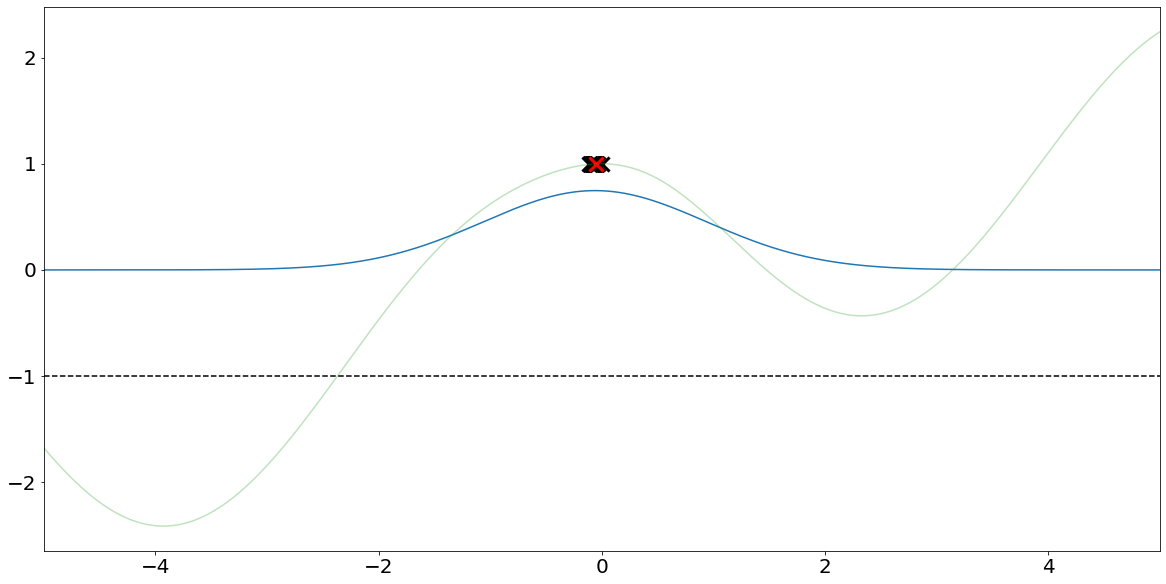

In [15]:

for t in range(100):
    # Obtain next query point
    x_next = opt.optimize()
    # Get a measurement from the real system
    y_meas = fun(x_next)
    print("[--] t: {}\txt: {}\tyt: {}".format(t, x_next, y_meas))
    # Add this to the GP model
    opt.add_new_data_point(x_next, y_meas)

plot_gp()